# ORGANIZACYJNIE
## Podpięcie dysku (google colab only)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import bibliotek

In [2]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam

# ZABAWA

## Definicja zmiennych

In [26]:
train_path = 'AI_train/'
test_path = 'AI_test/'

img_height, img_width = 250, 250
batch_size = 32

## Zliczenie elementów do treningu

In [4]:
classes = []
class_counter = 0

for dirname, _, filenames in os.walk(train_path):
  if dirname.endswith('/') or '.ipynb_chepoints' in dirname:
      continue

  else:
    classes.append({dirname.split('/')[-1]: 0})
  file_count = 0
  for filename in filenames:
    file_count += 1
  classes[class_counter][dirname.split('/')[-1]] = file_count
  class_counter +=1

print('{:<15} {:<15}'.format('Class', 'Number of instances'))
print()
for d in classes:
  [(k,v)] = d.items()
  print('{:<15} {:15}'.format(k,v))

Class           Number of instances

fruit-apple                4039
fruit-banana               1096
fruit-citrus               4031


## Trochę statystyk

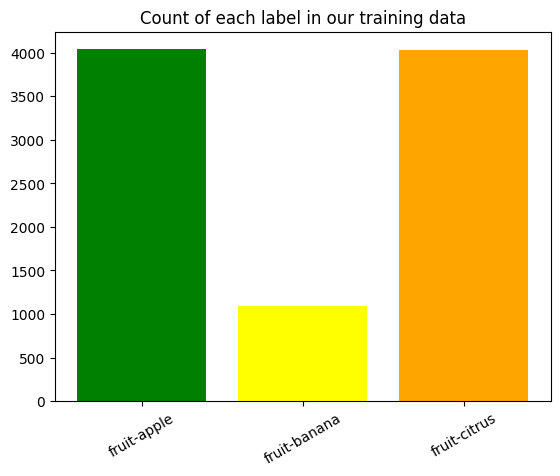

In [5]:
counts = []
labels = []

for i in classes:
  [(k,v)] = i.items()
  labels.append(k)
  counts.append(v)

plot.figure()
plot.bar(range(len(counts)), counts, color = ['green','yellow','orange'])
plot.xticks(range(len(counts)), labels, rotation = 30)
plot.title('Count of each label in our training data')
plot.show()

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
    )

train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 7334 images belonging to 3 classes.
Found 1832 images belonging to 3 classes.


## Model

In [117]:
patric_model = Sequential([
    Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),padding='same',activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(3,activation='softmax') # liczba klas
])

# patric_model = load_model('patric_modeler.keras')

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
patric_model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Trening

In [121]:
session = patric_model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


229/229 ━━━━━━━━━━━━━━━━━━━━ 191s 816ms/step - accuracy: 0.5179 - loss: 0.9616 - val_accuracy: 0.6086 - val_loss: 0.8662
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.6875 - loss: 0.7029 - val_accuracy: 0.7500 - val_loss: 0.5564
Epoch 3/50


c:\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


229/229 ━━━━━━━━━━━━━━━━━━━━ 190s 813ms/step - accuracy: 0.6385 - loss: 0.7864 - val_accuracy: 0.6891 - val_loss: 0.6906
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.6250 - loss: 0.8350 - val_accuracy: 0.3750 - val_loss: 1.4618
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 177s 757ms/step - accuracy: 0.6753 - loss: 0.7224 - val_accuracy: 0.7012 - val_loss: 0.7147
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.7188 - loss: 0.6486 - val_accuracy: 0.6250 - val_loss: 0.8753
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 171s 733ms/step - accuracy: 0.6981 - loss: 0.6856 - val_accuracy: 0.6919 - val_loss: 0.7154
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.7500 - loss: 0.6373 - val_accuracy: 0.8750 - val_loss: 0.4116
Epoch 9/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 174s 748ms/step - accuracy: 0.7096 - loss: 0.6965 - val_accuracy: 0.7555 - val_loss: 0.6115
Epoch 10/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - accuracy: 0.6562 - loss: 0.6054 - va

## Problem?
Epoch 1/50
c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
200/200 ━━━━━━━━━━━━━━━━━━━━ 198s 962ms/step - accuracy: 0.5397 - loss: 0.9967 - val_accuracy: 0.5732 - val_loss: 0.8752
Epoch 2/50
  1/200 ━━━━━━━━━━━━━━━━━━━━ 58s 295ms/step - accuracy: 0.6875 - loss: 0.8452
c:\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)

In [86]:
patric_model.save('patric_modeler2.keras')
patric_model.save('patric_weights2.h5')

In [9]:
loss, accuracy = patric_model.evaluate(validation_generator)
print("Accuracy: ",accuracy)
print("Loss: ", loss)

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 436ms/step - accuracy: 0.8374 - loss: 0.4302
Accuracy:  0.8346070051193237
Loss:  0.432097852230072


## Test modelu

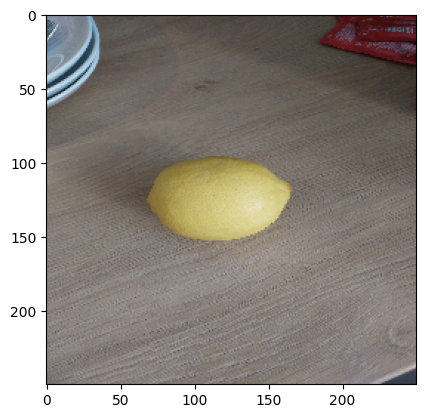

In [29]:
file = "cyt.jpg"
image = cv2.imread(file)
image = cv2.resize(image, (250,250))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32')
# image = 255-image
image /= 255

from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()


In [30]:
pred = model2.predict(image.reshape(1,250,250,3), batch_size = 1)

predicted_class_index = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

print("Prediciton value: ",predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediciton value:  fruit-citrus
